In [1]:
#importing necessary libraries
import pandas as pd
from html.parser import HTMLParser
import re as re
import unicodedata as uni
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer


from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import math
from nltk.stem import PorterStemmer

# 1. Data cleaning :

In [ ]:
#opening generic tweets and assigning it  to variable gt.
o=open('generic_tweets.txt','r')
gt=o.readlines()
#gt

In [4]:
#converting gt text format to csv format and assigning it to variable gt_df
gt_df=pd.read_csv('generic_tweets.txt',sep=',')
# having a first look at gt_df
gt_df.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
#reading Canadian_elections_2019 csv file and assigning it to election variable
election=pd.read_csv('Canadian_elections_2019.csv')
election.head()

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."


In [6]:
#opening the stop_words file and assigning its lines to the stopwords variable
oo=open('stop_words.txt','r')
stopwords=oo.readlines()


In [ ]:
#removing the new line sign from stopwords
list2 = [x.replace('\n', '') for x in stopwords]
#list2

In some words having ', after removing punctuations, we will face a problem. For example, after removing puctations from word 'I've', we will have 'I' and 've' separately. 've' is not in the stopwords. Therefore, I will first split such words by ' and remove the second part ,and then, add the second part to stopwords list.

In [9]:
for idx, val in enumerate(list2):
    if list2[idx].endswith("'t"):
        list2[idx]=list2[idx][:-2]
    if list2[idx].endswith("'ve") or list2[idx].endswith("'ll"):
        list2[idx]=list2[idx][:-3]

list2

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apparently',
 'approximately',
 'are',
 'aren',
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'beginning',
 'beginnings',
 'begins',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'biol',
 'both',
 'brief',
 'briefly',
 'but',
 'by',
 'c',
 'ca',
 'came',
 'can',
 'ca

In [ ]:
#Here, I will add 'll' and 've' to the stopwords because I removed them from words in the previous step.
list2.append('ll')
list2.append('ve')
#list2

In [11]:
import html


For data cleaning, I defined a function named data_cleaner. It needs 3 arguments for input:

• The data frame having a column that needs to be cleaned.

• The column that needs to be cleaned.

• The list of stop words.

In the function, for every step of datacleaning, I defined an individual column for that step.

In [12]:
def data_cleaner(dataframe,text,stopwords):
    #converting all characters to lowercase:
    dataframe.loc[:,'text_lower'] = dataframe["text"].apply(lambda x: x.lower())
    #removing urls:
    dataframe.loc[:,'text_lower_without_urls']=dataframe["text_lower"].apply(lambda x:re.sub('(http[s]?:\/\/[\w\.-\/]+[\s]*)',' ',x))
    #removing html tags and attributes:
    dataframe.loc[:,'text_lower_without_urls_htmltags']=dataframe['text_lower_without_urls'].apply(lambda x:re.sub('<[^<]+?>','',x))
    #replacing html characters with an ASCII equivelant:
    dataframe.loc[:,'text_lower_without_urls_htmltags_htmlcharacters']=dataframe['text_lower_without_urls_htmltags'].apply(lambda x: html.unescape(x))
    #removing newline signs:
    dataframe.loc[:,'text_lower_without_urls_htmltags_htmlcharacters_newline']=dataframe["text_lower_without_urls_htmltags_htmlcharacters"].apply(lambda x:re.sub(r'\n',' ',x))
    
    #dataframe.loc[:,'sara']=dataframe["shiva"].apply(lambda x: re.sub(r'(x[0-9A-Fa-f][0-9A-Fa-f])+',' ', x))
    #dataframe.loc[:,'text_lower_without_hastags_mentions_urls']=dataframe["text_lower"].apply(lambda x:re.sub('(@[\w]+)|(^rt\s+)|(http[s]:\/\/[\w\.-\/]+[\s]*)|(#)',' ',x))
    
    #removing punctuations:
    dataframe.loc[:,'text_lower_without_urls_htmltags_htmlcharacters_newline_punct']=dataframe["text_lower_without_urls_htmltags_htmlcharacters_newline"].apply(lambda x:re.sub('([^\w]+)',' ',x))
    #removing stopwords:
    dataframe.loc[:,"text_lower_without_urls_htmltags_htmlcharacters_newline_punct_stopwords"]=dataframe["text_lower_without_urls_htmltags_htmlcharacters_newline_punct"].apply(lambda x: str(" ".join(i for i in x.split() if i not in stopwords)))
    #dataframe.loc[:,'text_lower_without_urls_htmltags_htmlcharacters_newline_punct_stopwords_stem'] = dataframe["text_lower_without_urls_htmltags_htmlcharacters_newline_punct_stopwords"].apply(lambda x: str(" ".join(PorterStemmer().stem(i) for i in x.split()))) # stem 
    #dataframe.loc[:,'text_also_without_urls'] = dataframe["text_lower_without_hastags_mentions_urls_punct_stopwords"].apply(lambda x:re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE))
    #removing digits:
    dataframe.loc[:,'clean'] = dataframe['text_lower_without_urls_htmltags_htmlcharacters_newline_punct_stopwords'].str.replace('\d+', '')
    return (dataframe)

In [13]:
#applying the data_cleaner function to election
data_cleaner(election,'text',list2)

,sentiment,negative_reason,text,text_lower,text_lower_without_urls,text_lower_without_urls_htmltags,text_lower_without_urls_htmltags_htmlcharacters,text_lower_without_urls_htmltags_htmlcharacters_newline,text_lower_without_urls_htmltags_htmlcharacters_newline_punct,text_lower_without_urls_htmltags_htmlcharacters_newline_punct_stopwords,clean
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","b""@rosiebarton so instead of your suggestion, ...","b""@rosiebarton so instead of your suggestion, ...","b""@rosiebarton so instead of your suggestion, ...","b""@rosiebarton so instead of your suggestion, ...","b""@rosiebarton so instead of your suggestion, ...",b rosiebarton so instead of your suggestion ho...,rosiebarton suggestion agree canadian women tr...,rosiebarton suggestion agree canadian women tr...
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","b""#allwomanspacewalk it's real!\n@space_statio...","b""#allwomanspacewalk it's real!\n@space_statio...","b""#allwomanspacewalk it's real!\n@space_statio...","b""#allwomanspacewalk it's real!\n@space_statio...","b""#allwomanspacewalk it's real!\n@space_statio...",b allwomanspacewalk it s real n space_station ...,allwomanspacewalk real space_station etobicoke...,allwomanspacewalk real space_station etobicoke...
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","b""#brantford it's going to cost you $94 billio...","b""#brantford it's going to cost you $94 billio...","b""#brantford it's going to cost you $94 billio...","b""#brantford it's going to cost you $94 billio...","b""#brantford it's going to cost you $94 billio...",b brantford it s going to cost you 94 billion ...,brantford going cost 94 billion 4 years justin...,brantford going cost billion years justin el...
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","b""#canada #canadaelection2019 #canadavotes \n#...","b""#canada #canadaelection2019 #canadavotes \n#...","b""#canada #canadaelection2019 #canadavotes \n#...","b""#canada #canadaelection2019 #canadavotes \n#...","b""#canada #canadaelection2019 #canadavotes \n#...",b canada canadaelection2019 canadavotes n elxn...,canada canadaelection2019 canadavotes elxn43 n...,canada canadaelection canadavotes elxn ncan t ...
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","b""#canada #taxpayers are sick &amp; tired of h...","b""#canada #taxpayers are sick &amp; tired of h...","b""#canada #taxpayers are sick &amp; tired of h...","b""#canada #taxpayers are sick & tired of havin...","b""#canada #taxpayers are sick & tired of havin...",b canada taxpayers are sick tired of having th...,canada taxpayers sick tired hard earned donate...,canada taxpayers sick tired hard earned donate...
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","b""#canadavotes2019 #elxn43 #cdnpoli - facts - ...","b""#canadavotes2019 #elxn43 #cdnpoli - facts - ...","b""#canadavotes2019 #elxn43 #cdnpoli - facts - ...","b""#canadavotes2019 #elxn43 #cdnpoli - facts - ...","b""#canadavotes2019 #elxn43 #cdnpoli - facts - ...",b canadavotes2019 elxn43 cdnpoli facts blastfr...,canadavotes2019 elxn43 cdnpoli facts blastfrom...,canadavotes elxn cdnpoli facts blastfromthepas...
6,positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...","b""#cdnmedia #elxn43 #cdnpoli #ppc rocky dong h...","b""#cdnmedia #elxn43 #cdnpoli #ppc rocky dong h...","b""#cdnmedia #elxn43 #cdnpoli #ppc rocky dong h...","b""#cdnmedia #elxn43 #cdnpoli #ppc rocky dong h...","b""#cdnmedia #elxn43 #cdnpoli #ppc rocky dong h...",b cdnmedia elxn43 cdnpoli ppc rocky dong hands...,cdnmedia elxn43 cdnpoli ppc rocky dong hands b...,cdnmedia elxn cdnpoli ppc rocky dong hands bes...
7,positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...","b""#cdnpoli #elxn43 the liberals ++ more than d...","b""#cdnpoli #elxn43 the liberals ++ more than d...","b""#cdnpoli #elxn43 the liberals ++ more than d...","b""#cd

In [14]:
#applying the data_cleaner function to gt_df
data_cleaner(gt_df,'text',list2)

,class,id,date,query,user,text,text_lower,text_lower_without_urls,text_lower_without_urls_htmltags,text_lower_without_urls_htmltags_htmlcharacters,text_lower_without_urls_htmltags_htmlcharacters_newline,text_lower_without_urls_htmltags_htmlcharacters_newline_punct,text_lower_without_urls_htmltags_htmlcharacters_newline_punct_stopwords,clean
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t...","@switchfoot - awww, that's a bummer. you sho...","@switchfoot - awww, that's a bummer. you sho...","@switchfoot - awww, that's a bummer. you sho...","@switchfoot - awww, that's a bummer. you sho...",switchfoot awww that s a bummer you shoulda g...,switchfoot awww bummer shoulda david carr thir...,switchfoot awww bummer shoulda david carr thir...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can t update his facebook by ...,upset t update facebook texting cry result sch...,upset t update facebook texting cry result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,kenichan i dived many times for the ball mana...,kenichan dived times ball managed save 50 rest...,kenichan dived times ball managed save rest b...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,body feels itchy fire,body feels itchy fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....",nationwideclass no it s not behaving at all i...,nationwideclass behaving mad t,nationwideclass behaving mad t
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,@kwesidei not the whole crew,@kwesidei not the whole crew,@kwesidei not the whole crew,@kwesidei not the whole crew,@kwesidei not the whole crew,kwesidei not the whole crew,kwesidei crew,kwesidei crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need a hug,need a hug,need a hug,need a hug,need a hug,need a hug,hug,hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,@loltrish hey long time no see! yes.. rains a...,@loltrish hey long time no see! yes.. rains a...,@loltrish hey long time no see! yes.. rains a...,@loltrish hey long time no see! yes.. rains a...,@loltrish hey long time no see! yes.. rains a...,loltrish hey long time no see yes rains a bit...,loltrish hey long time rains bit bit lol fine,loltrish hey long time rains bit bit lol fine
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,@tatiana_k nope they didn't have it,@tatiana_k nope they didn't have it,@tatiana_k nope they didn't have it,@tatiana_k nope they didn't have it,@tatiana_k 

# 2. Exploratory analysis:

### a)

First of all, I create 3 lists for different parties. The elements of these lists are words related to each party. I extracted relative words from different web sites such as http://politwitter.ca/page/canadian-politics-hash-tags

In [ ]:
liberal=['lpc','liberal','ptlib','justin','trudeau','papineau','frenchdebate','chooseforward']
conservative=['cpc', 'conservative','pttory','andrew','scheer','regina—quAppelle','getahead']
ndp=['ndp','ptndp','jagmeet' ,'singh','burnaby south','initforyou']

#creating a list from column'clean' of election and assigning it to tweet_list variable
tweet_list = election["clean"].tolist()
#tweet_list

Here, I define a function to determine the political party of each tweet. Based on the pre-defined lists for each party, if in a tweet, there are one or more words related to a party, the functions returns the party name. However, if there isn't any word related to the parties in the tweets or a tweet has words related to more than one party, the function returns 'none'.

In [16]:
def political_party(tweet):
    result = ""
    for lw in liberal:
        if tweet.find(lw)!=-1:
            result = 'liberal'
           
    for cw in conservative:
        if tweet.find(cw)!=-1:
            if result == 'liberal':
                result = 'none'
            else:
                result = 'conservative'
    for ndpw in ndp:
         if tweet.find(ndpw)!=-1:
            if  result== 'liberal' or result == 'conservative' or result == 'none':
                result = 'none'
            else:
                result = 'ndp'
    if result!='liberal' and result!='conservative' and result!='ndp':
        result='none'
    return result

I assign the number of tweets in the election dataframe related to each party or none of them identified by the function to 4 variables. I also define a list that will contain the output of the function for each tweet.

In [17]:
def find_counter(tweet_list):
    l_counter=0
    c_counter=0
    ndp_counter=0
    none_counter=0
    list_party=[]
    #applying the political_party function to each tweet in the tweet_list
    for tweet in tweet_list:
        result = political_party(tweet)
        list_party.append(result)
        print(result)
        if result=='liberal':
            l_counter+=1
        elif result=='conservative':
            c_counter+=1
        elif result=='ndp':
            ndp_counter+=1
        else:
            none_counter+=1
    return list_party,l_counter,c_counter,ndp_counter,none_counter
            

In [ ]:
list_party,l_counter,c_counter,ndp_counter,none_counter = find_counter(tweet_list)

In [ ]:
#creating a list from column'clean' of gt_df and assigning it to tweet_list2 variable
tweet_list2= gt_df["clean"].tolist()
#tweet_list2

I assign the number of tweets in the gt_df dataframe related to each party or none of them identified by the function to 4 variables. I also define a list that will contain the output of the function for each tweet.

In [ ]:
list_party2,l_counter2,c_counter2,ndp_counter2,none_counter2 = find_counter(tweet_list2)
    

### The distribution of the political affiliations of the tweets:

In [22]:
# I add list_party to election as a new column 'party.'
election['party']=list_party

In [23]:
election['party'].value_counts(normalize=True)

none            0.506329
conservative    0.248476
liberal         0.174402
ndp             0.070792
Name: party, dtype: float64

Between the tweets recognized to be related to one of the three parties, most of them are related to conservatives. 

Based on the function I defined, we can see that most of the tweets as they were vague and containing words related to more than one party were not recognized to be related to one of the three parties. 


### b)

#### •	For the 2019 Canadian elections tweets:

Now, I will draw a countpolt and barplot, respectively, in order to compare negative and positive tweets in election related to different parties.

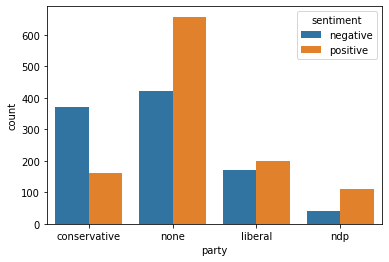

In [27]:
sns.countplot(x=election['party'], hue=election['sentiment'],data=election)

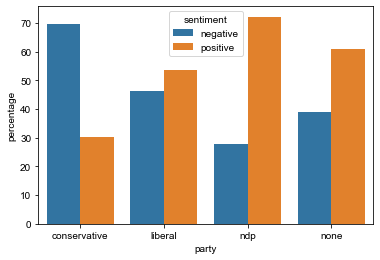

In [28]:
party_sentiment = (election.groupby(['party'])['sentiment']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('party'))
p = sns.barplot(x="party", y="percentage", hue="sentiment", data=party_sentiment)
sns.set(rc={'figure.figsize':(11.7,8.27)})

We can see that only tweets about conservatives is more negative than positive. the number of negative tweets about other parties is less than positive ones.

#### • For the generic tweets:

In [ ]:
# I add list_party2 to gt_df as a new column 'party.'
gt_df['party']=list_party2
gt_df[['party']]

In [30]:
gt_df['class'].unique()

array([0, 4], dtype=int64)

I will draw a countpolt and barplot, respectively, in order to compare negative and positive tweets in gt_df related to different parties.

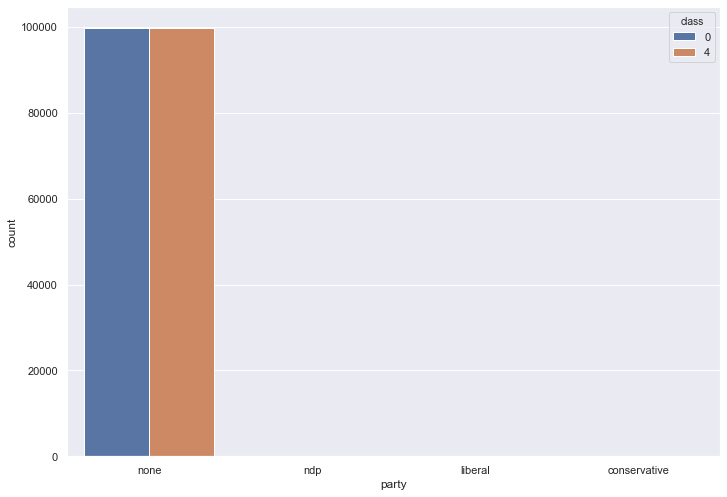

In [31]:
sns.countplot(x=gt_df['party'], hue=gt_df['class'],data=gt_df)

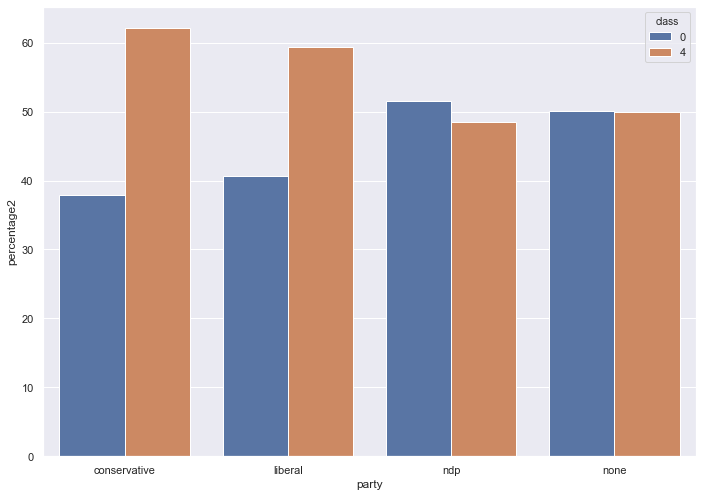

In [32]:
party_class = (gt_df.groupby(['party'])['class']
                     .value_counts(normalize=True)
                     .rename('percentage2')
                     .mul(100)
                     .reset_index()
                     .sort_values('party'))
p = sns.barplot(x="party", y="percentage2", hue="class", data=party_class)
sns.set(rc={'figure.figsize':(11.7,8.27)})

As we see, in the generic tweets, positive tweets has the highest share of tweets about liberals and conservatives. 

However, tweets about ndp in the generic tweets are more negative. In fact, most tweets in the generic tweets about ndp have been written by people having negative impression about this party. 

## Bonus:

I draw a countplot to see how many tweets are related to each party in election dataset.

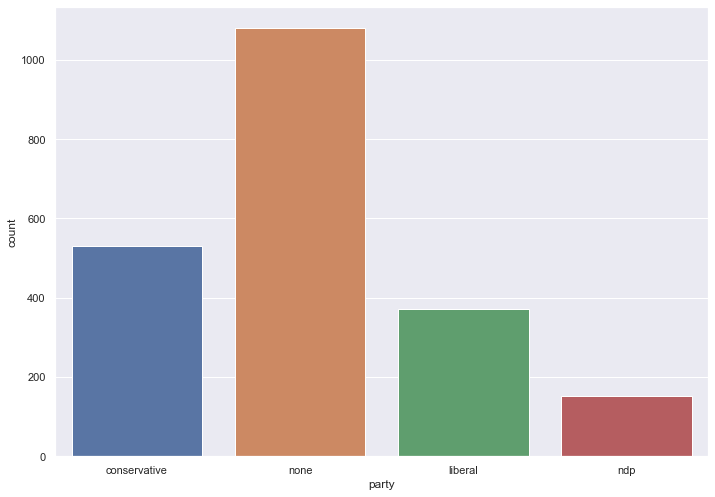

In [33]:
sns.countplot(x=election['party'],data=election)


As we can understand from the above graph, most of the tweets did not belong to one of the three parties. After that, conservative party was the most topic discussed among the tweets.  

## Bonus:
    word cloud

I draw a wordcloud for the clean clean column of the election dataset:

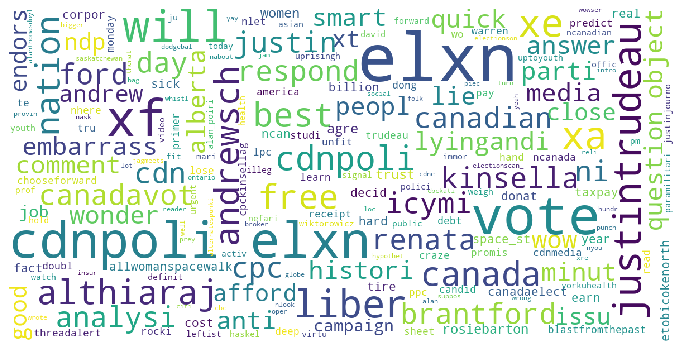

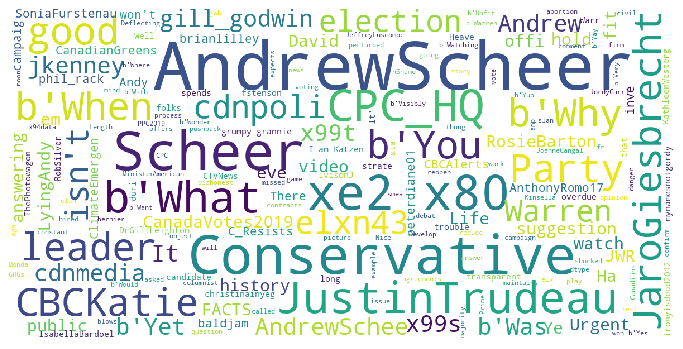

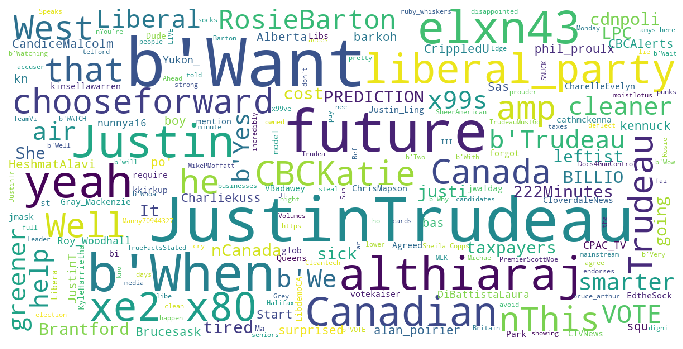

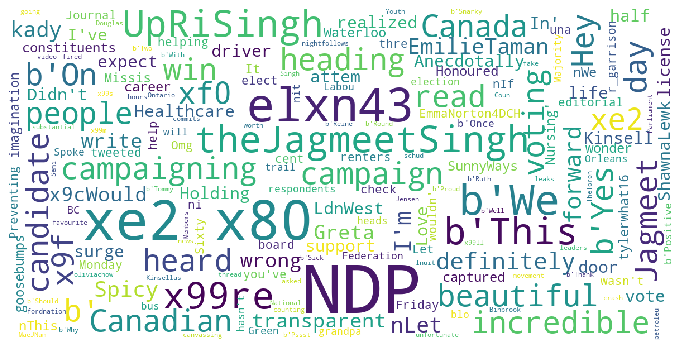

In [39]:
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud
import matplotlib.pyplot as plt


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=list2,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
ww=election[election['party']=='conservative']
qq=election[election['party']=='liberal']
rr=election[election['party']=='ndp']
show_wordcloud(election['clean_clean'])
show_wordcloud(ww['text'])
show_wordcloud(qq['text'])
show_wordcloud(rr['text'])

Here, I define another functon for data cleaning named datacleaner2. The reason why I didn't merge it to the previous datacleaner funtion is that it applies stemming to a column of a dataframe. For example, if the input of this function is liberal, its output will be liber.

I define this function and apply it to the clean column of both gt_df and election here after part 2 because part 2 needs original form of a word, e.g. it needs liberal, not liber.

In [34]:
def datacleaner2(dataframe2):
    dataframe2.loc[:,'clean_clean'] = dataframe2["clean"].apply(lambda x: str(" ".join(PorterStemmer().stem(i) for i in x.split()))) # stem 


In [38]:
datacleaner2(election)

In [36]:
datacleaner2(gt_df)

# 3. Model preparation:

### a) feature selection

### Bag of Words:

In [40]:
gt_df['clean_clean']=gt_df['clean_clean'].apply(lambda x: str(" ".join(i for i in x.split() if len(i)>2)))
vectorizer = CountVectorizer(max_features=100)
array_WF = vectorizer.fit_transform(gt_df['clean_clean']).toarray()
#print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())
print(array_WF)

['amaz', 'awesom', 'bad', 'bed', 'best', 'better', 'bit', 'bore', 'call', 'cant', 'check', 'cool', 'damn', 'day', 'dont', 'earli', 'eat', 'enjoy', 'feel', 'final', 'find', 'finish', 'follow', 'friend', 'fun', 'game', 'girl', 'gonna', 'good', 'great', 'guess', 'guy', 'haha', 'happi', 'hate', 'head', 'help', 'hey', 'hope', 'hour', 'hous', 'hurt', 'keep', 'leav', 'life', 'listen', 'live', 'lol', 'long', 'lost', 'lot', 'love', 'man', 'miss', 'monday', 'morn', 'movi', 'nice', 'night', 'peopl', 'phone', 'play', 'pretti', 'rain', 'read', 'readi', 'sad', 'school', 'sick', 'sleep', 'song', 'sound', 'start', 'suck', 'sunday', 'sure', 'talk', 'thing', 'thought', 'time', 'tire', 'today', 'tomorrow', 'tonight', 'tweet', 'twitter', 'wait', 'wanna', 'watch', 'weather', 'week', 'weekend', 'well', 'will', 'won', 'work', 'wow', 'yay', 'yeah', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
bagofwords=pd.DataFrame(array_WF, columns=vectorizer.get_feature_names())
#bagofwords

In [42]:
bagofwords['class']=gt_df['class']
bagofwords.head()

,amaz,awesom,bad,bed,best,better,bit,bore,call,cant,...,weekend,well,will,won,work,wow,yay,yeah,year,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF_IDF

In [43]:
vectorizer3 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None,max_features=100)
array_TFIDF = vectorizer3.fit_transform(gt_df['clean_clean']).toarray()
print( vectorizer3.get_feature_names() )
print( array_TFIDF )

['amaz', 'awesom', 'bad', 'bed', 'best', 'better', 'bit', 'bore', 'call', 'cant', 'check', 'cool', 'damn', 'day', 'dont', 'earli', 'eat', 'enjoy', 'feel', 'final', 'find', 'finish', 'follow', 'friend', 'fun', 'game', 'girl', 'gonna', 'good', 'great', 'guess', 'guy', 'haha', 'happi', 'hate', 'head', 'help', 'hey', 'hope', 'hour', 'hous', 'hurt', 'keep', 'leav', 'life', 'listen', 'live', 'lol', 'long', 'lost', 'lot', 'love', 'man', 'miss', 'monday', 'morn', 'movi', 'nice', 'night', 'peopl', 'phone', 'play', 'pretti', 'rain', 'read', 'readi', 'sad', 'school', 'sick', 'sleep', 'song', 'sound', 'start', 'suck', 'sunday', 'sure', 'talk', 'thing', 'thought', 'time', 'tire', 'today', 'tomorrow', 'tonight', 'tweet', 'twitter', 'wait', 'wanna', 'watch', 'weather', 'week', 'weekend', 'well', 'will', 'won', 'work', 'wow', 'yay', 'yeah', 'year']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [44]:
tfidf=pd.DataFrame(array_TFIDF, columns=vectorizer3.get_feature_names())

In [45]:
tfidf['class']=gt_df['class']
tfidf.head()

,amaz,awesom,bad,bed,best,better,bit,bore,call,cant,...,weekend,well,will,won,work,wow,yay,yeah,year,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Using bag of words and Tf_Idf feature selection, I got 100 most common and important words in the text column of the generic tweets as features:
	Some of these words are relative adjectives to a particular sense.


## Bonus:


### word embeddings:

In [46]:
try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

In [47]:
tokenized_sentences = [sentence.split() for sentence in election['clean']]
model_model = word2vec.Word2Vec(tokenized_sentences, size=100, min_count=1)

In [48]:
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    text = text.split(' ')
    for word in text:
        vec += model_model['word'].reshape((1, size))
        count += 1.
    if count != 0:
        vec /= count
    return vec

In [49]:
array_wordEmbedding = np.concatenate([buildWordVector(z, 100) for z in election['clean']])
array_wordEmbedding

C:\Users\sketa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 0.0177836 , -0.04119381,  0.0303505 , ..., -0.00166438,
         0.00363261, -0.00744744],
       [ 0.0177836 , -0.04119381,  0.0303505 , ..., -0.00166438,
         0.00363261, -0.00744744],
       [ 0.0177836 , -0.04119381,  0.0303505 , ..., -0.00166438,
         0.00363261, -0.00744744],
       ...,
       [ 0.0177836 , -0.04119381,  0.0303505 , ..., -0.00166438,
         0.00363261, -0.00744744],
       [ 0.0177836 , -0.04119381,  0.0303505 , ..., -0.00166438,
         0.00363261, -0.00744744],
       [ 0.0177836 , -0.04119381,  0.0303505 , ..., -0.00166438,
         0.00363261, -0.00744744]])

### b) splitting the dataset into training and testing set:

In [51]:
x1=bagofwords.drop(columns='class')
y1=bagofwords[['class']]
x2=tfidf.drop(columns='class')
y2=tfidf[['class']]

In [52]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.3)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.3)

# 4. Model implementation:

### a)

I define a fit function for each of the classification algorithms.

### logistic regression:

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def fit_logistic_regression(x_train, y_train, x_test, y_test):
    model = LogisticRegression()
    model.fit(x_train,y_train)
    predictions_train = model.predict(x_train)
    score_train = accuracy_score(y_train, predictions_train)
    predictions_test = model.predict(x_test)
    score_test = accuracy_score(y_test, predictions_test)
    
    print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(score_train))

    print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(score_test))

In [45]:
fit_logistic_regression(x1_train, y1_train, x1_test, y1_test)

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic Regression classifier on training set: 0.64
Accuracy of Logistic Regression classifier on test set: 0.64


In [46]:
fit_logistic_regression(x2_train, y2_train, x2_test, y2_test)

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic Regression classifier on training set: 0.64
Accuracy of Logistic Regression classifier on test set: 0.64


## Bonus:
        hyperparameter tuning:

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

def hpt_logistic(x_train,y_train,x_test,y_test):
    param_grid = {'C': [0.1, 1, 10] }
    #clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
    cl=GridSearchCV(cv=None,
                 estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
                    dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
                 param_grid=param_grid)
    cl.fit(x_train,y_train)
    #The best hyper parameters set
    print("Best Hyper Parameters:\n",cl.best_params_)
    #Prediction
    prediction=cl.predict(x_test)


    #evaluation(Accuracy)
    print("Best Accuracy:",metrics.accuracy_score(prediction,y_test))
    #evaluation(Confusion Metrix)
    print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
    

In [63]:
hpt_logistic(x1_train,y1_train,x1_test,y1_test)

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\utils\validation.py

Best Hyper Parameters:
 {'C': 0.1}
Best Accuracy: 0.6374166666666666
Confusion Metrix:
 [[14239  6049]
 [15706 24006]]


### KNN:

In [55]:
from sklearn.neighbors import KNeighborsClassifier

#create an initial test kNN classifier and pass it the training data
def fit_KNN(x_train, y_train, x_test, y_test):
    model = KNeighborsClassifier() #n_neighbors=5
    model.fit(x_train,  y_train.values.ravel())

    print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(model.score(x_train, y_train)))

    print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(model.score(x_test, y_test)))

In [65]:
fit_KNN(x1_train, y1_train, x1_test, y1_test)

Accuracy of K-NN classifier on training set: 0.65
Accuracy of K-NN classifier on test set: 0.61


In [66]:
fit_KNN(x2_train, y2_train, x2_test, y2_test)

Accuracy of K-NN classifier on training set: 0.64
Accuracy of K-NN classifier on test set: 0.61


## Bonus:
    hyperparameter tuning:

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def hpt_KNN(x_train,y_train,x_test,y_test):
    #making the instance
    KNNmodel = KNeighborsClassifier(n_jobs=-1)
    #Hyper Parameters Set
    params = {'n_neighbors':[5,6],
              'leaf_size':[1,2],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'n_jobs':[-1]}
    #Making models with hyper parameters sets
    modelforKNN = GridSearchCV(KNNmodel, param_grid=params, n_jobs=1)
    #Learning
    modelforKNN.fit(x_train,y_train)
    #The best hyper parameters set
    print("Best Hyper Parameters:\n",modelforKNN.best_params_)
    #Prediction
    prediction=modelforKNN.predict(x_test)


    #evaluation(Accuracy)
    print("Accuracy:",metrics.accuracy_score(prediction,y_test))
    #evaluation(Confusion Metrix)
    print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

In [ ]:
hpt_KNN(x2_train,y2_train,x2_test,y2_test)

### Naive Bayes:

In [57]:
from sklearn.naive_bayes import GaussianNB
def fit_naive_bayes(x_train, y_train, x_test, y_test):
    model = GaussianNB()
    model.fit(x_train,y_train.values.ravel())
    predictions_train = model.predict(x_train)
    score_train = accuracy_score(y_train, predictions_train)
    predictions_test = model.predict(x_test)
    score_test = accuracy_score(y_test, predictions_test)
    
    print('Accuracy of Naive Bayes classifier on training set: {:.2f}'
     .format(score_train))

    print('Accuracy of Naive Bayes classifier on test set: {:.2f}'
     .format(score_test))


In [60]:
fit_KNN(x1_train, y1_train, x1_test, y1_test)

C:\Users\sketa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of K-NN classifier on training set: 0.65
Accuracy of K-NN classifier on test set: 0.61


In [69]:
fit_naive_bayes(x2_train, y2_train, x2_test, y2_test)

Accuracy of Naive Bayes classifier on training set: 0.63
Accuracy of Naive Bayes classifier on test set: 0.63


### SVM:

In [58]:
from sklearn import svm
import sklearn.svm as sksvm
from sklearn import metrics

In [59]:
def fit_SVM(x_train, y_train, x_test, y_test):
    clf = svm.SVC(gamma='scale')
    clf.fit(x_train,y_train.values.ravel())
    print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))
    

In [72]:
fit_SVM(x1_train, y1_train, x1_test, y1_test)

Accuracy of SVM classifier on test set: 0.64


In [73]:
fit_SVM(x2_train, y2_train, x2_test, y2_test)

Accuracy of SVM classifier on test set: 0.64


## Bonus:
    hyperparameter tuning:

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics

def hpt_SVM(x_train, y_train, x_test, y_test):
    #making the instance
    model=svm.SVC()
    #Hyper Parameters Set
    params = {'C': [6,7], 
              'kernel': ['linear','rbf']}
    #Making models with hyper parameters sets
    model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
    #Learning
    model1.fit(x_train,y_train)
    #The best hyper parameters set
    print("Best Hyper Parameters:\n",model1.best_params_)
    #Prediction
    prediction=model1.predict(x_test)
    #evaluation(Accuracy)
    print("Accuracy:",metrics.accuracy_score(prediction,y_test))
    #evaluation(Confusion Metrix)
    print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

In [ ]:
hpt_SVM(x1_train, y1_train, x1_test, y1_test)

In [ ]:
hpt_SVM(x2_train, y2_train, x2_test, y2_test)

### decision trees:

In [61]:
from sklearn.tree import DecisionTreeClassifier


In [62]:
def fit_dt(x_train, y_train, x_test, y_test):
    dtt = DecisionTreeClassifier(random_state=0)
    dtt=dtt.fit(x_train, y_train)
    print('Accuracy of decision trees classifier on test set: {:.2f}'
    .format(dtt.score(x_test,y_test)))


In [125]:
fit_dt(x1_train, y1_train, x1_test, y1_test)

Accuracy of decision trees classifier on test set: 0.62


In [126]:
fit_dt(x2_train, y2_train, x2_test, y2_test)

Accuracy of decision trees classifier on test set: 0.62


## Bonus:
    hyperparameter tuning:

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

def hpt_dt(x_train,y_train,x_test,y_test):
    #making the instance
    model= DecisionTreeClassifier(random_state=1234)
    #Hyper Parameters Set
    params = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3], 
              'min_samples_leaf':[1,2],
              'random_state':[123]}
    #Making models with hyper parameters sets
    model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
    #Learning
    model1.fit(x_train,y_train)
    #The best hyper parameters set
    print("Best Hyper Parameters:",model1.best_params_)
    #Prediction
    prediction=model1.predict(x_test)

    #evaluation(Accuracy)
    print("Best Accuracy:",metrics.accuracy_score(prediction,y_test))
    #evaluation(Confusion Metrix)
    print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

In [129]:
hpt_dt(x1_train,y1_train,x1_test,y1_test)

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters: {'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 123}
Best Accuracy: 0.6294166666666666
Confusion Metrix:
 [[14774  7064]
 [15171 22991]]


In [130]:
hpt_dt(x2_train,y2_train,x2_test,y2_test)

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters: {'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 123}
Best Accuracy: 0.6329666666666667
Confusion Metrix:
 [[15021  7095]
 [14927 22957]]


### ensembles(RF)

In [64]:
def fit_rf(x_train, y_train, x_test, y_test):
    from sklearn.ensemble import RandomForestClassifier
    RF = RandomForestClassifier(n_estimators=10)
    RF = RF.fit(x_train, y_train)
    print('Accuracy of Random Forest classifier on test set: {:.2f}'
    .format(RF.score(x_test, y_test)))


In [132]:
fit_rf(x1_train,y1_train,x1_test,y1_test)

C:\Users\sketa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy of Random Forest classifier on test set: 0.63


In [133]:
fit_rf(x2_train,y2_train,x2_test,y2_test)

C:\Users\sketa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy of Random Forest classifier on test set: 0.63


## Bonus:
    hyperparameter tuning:

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

def hpt_rf(x_train,y_train,x_test,y_test):
    #making the instance
    model=RandomForestClassifier()
    #hyper parameters set
    params = {'criterion':['gini','entropy'],
              'n_estimators':[10,15],
              'min_samples_leaf':[1,2],
              'min_samples_split':[3,4], 
              'random_state':[123],
              'n_jobs':[-1]}
    #Making models with hyper parameters sets
    model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
    #learning
    model1.fit(x_train,y_train)
    #The best hyper parameters set
    print("Best Hyper Parameters:\n",model1.best_params_)
    #Prediction
    prediction=model1.predict(x_test)

    #evaluation(Accuracy)
    print("Best Accuracy:",metrics.accuracy_score(prediction,y_test))
    #evaluation(Confusion Metrix)
    print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

In [111]:
hpt_rf(x1_train,y1_train,x1_test,y1_test)

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 15, 'n_jobs': -1, 'random_state': 123}
Best Accuracy: 0.63795
Confusion Metrix:
 [[14903  6537]
 [15186 23374]]


In [112]:
hpt_rf(x2_train,y2_train,x2_test,y2_test)

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 15, 'n_jobs': -1, 'random_state': 123}
Best Accuracy: 0.6368833333333334
Confusion Metrix:
 [[14798  6560]
 [15227 23415]]


### ensembles(XGBoost)

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

In [137]:
def fit_xgboost(x_train, y_train, x_test, y_test): 
    xg= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)
    print('Accuracy of xgboost classifier on test set: {:.2f}'
    .format(xg.score(x_test, y_test)))

    
    
    

In [138]:
fit_xgboost(x1_train, y1_train, x1_test, y1_test)

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of xgboost classifier on test set: 0.64


In [139]:
fit_xgboost(x2_train, y2_train, x2_test, y2_test)

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of xgboost classifier on test set: 0.64


In [211]:
try:
    from xgboost import XGBClassifier
except:
    !pip install xgboost
    from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
def hpt_xgboost(x_train,y_train,x_test,y_test):
    # A parameter grid for XGBoost
    params = {
            'min_child_weight': [1, 10],
            'gamma': [0.5, 1, 1.5],
            'subsample': [0.6, 1.0],
            'colsample_bytree': [0.6,1.0],
            'max_depth': [3, 5]
            }
    xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                        silent=True, nthread=1)
    folds = 3
    param_comb = 5

    skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

    random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, verbose=3, random_state=1001 )
    random_search.fit(x_train, y_train)
    print('\n Best estimator:')
    print(random_search.best_estimator_)
    print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
    print(random_search.best_score_ * 2 - 1)
    print('\n Best hyperparameters:')
    print(random_search.best_params_)

We can see that the best accuracy is obtained by using logistic regression model and bag of words as the feature selection algorithm.

Now, I will implement this model on the 2019 Canadian elections data.

In [69]:
#creating a new array for vectorizing the election dataset based on the previous features.
hh=vectorizer.transform(election['clean_clean']).toarray()
#array2_WF = vectorizer.fit_transform(election['clean_clean']).toarray()

In [ ]:
#creating a dataframe from the hh array.
bag_ofwords=pd.DataFrame(hh, columns=vectorizer.get_feature_names())
#bag_ofwords

In [71]:
#adding the sentiment column to the new dataframe.
bag_ofwords['sentiment']=election['sentiment']

In [72]:
#splitting train and test set
xx=bag_ofwords.drop(columns='sentiment')
yy=bag_ofwords['sentiment']
xx_train, xx_test, yy_train, yy_test = train_test_split(xx,yy,test_size=0.3)


In [73]:
#fitting our model to the new train and test set.
fit_logistic_regression(xx_train, yy_train, xx_test, yy_test)

Accuracy of Logistic Regression classifier on training set: 0.63
Accuracy of Logistic Regression classifier on test set: 0.56


C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


As we can see, the accuracy of my model on the test set of election dataset is 0.59 showing that its performance to predict the true sentiment labelled in the 2019 Canadian elections data is almost good.

In [74]:
#using our model to predict the sentiment labels
main_model = LogisticRegression()
main_model.fit(xx_train,yy_train.values.ravel())
predictions_train = main_model.predict(xx_train)
#score_train = accuracy_score(yy_train, predictions_train)
predictions_test =main_model.predict(xx_test)
#score_test = accuracy_score(yy_test, predictions_test)

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
#creating a dataframe with the following columns.
results=pd.DataFrame(main_model.predict(xx),columns=['sentiment prediction'])
results['true sentiment']=election['sentiment']
results['party']=election['party']
results

,sentiment prediction,true sentiment,party
0,negative,negative,conservative
1,negative,positive,none
2,negative,negative,liberal
3,positive,positive,none
4,negative,negative,liberal
5,positive,negative,conservative
6,positive,positive,none
7,negative,positive,none
8,negative,negative,liberal
9,negative,negative,none


Here, I will visualize the sentiment prediction results and the true sentiment for each of the 3 parties. 

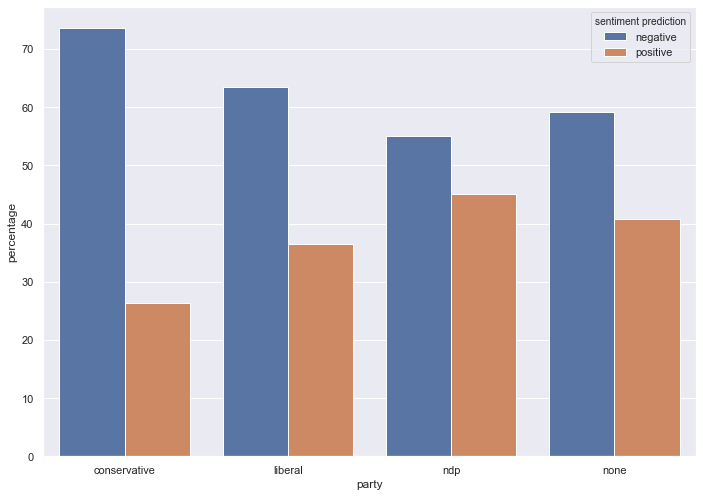

In [76]:
#the barplot of sentiment prediction based on different parties
party_sentiment_prediction = (results.groupby(['party'])['sentiment prediction']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('party'))
p = sns.barplot(x="party", y="percentage", hue='sentiment prediction', data=party_sentiment_prediction)
sns.set(rc={'figure.figsize':(11.7,8.27)})

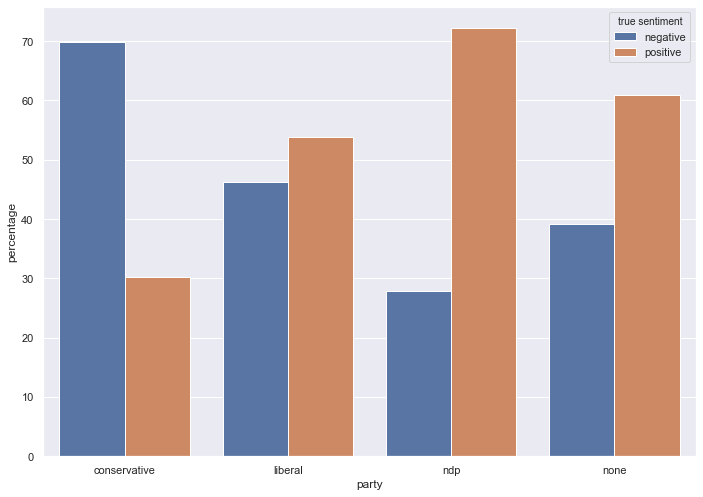

In [77]:
#the barplot of true sentiment based on different parties
party_true_sentiment = (results.groupby(['party'])['true sentiment']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('party'))
p = sns.barplot(x="party", y="percentage", hue='true sentiment', data=party_true_sentiment)
sns.set(rc={'figure.figsize':(11.7,8.27)})

As we can see, the prediction results show that the majority of tweets about each of the four divisions (liberal, conservative, ndp, and none) is negative. However, liberals were winner of the election. Therefore, the positive ideas of the whole people about liberal should have been more.



In my opinion, NLP analytics based on tweets is not useful for political parties during election campaigns in general because as we understood, the prediction results for tweets about liberal party was more negative showing that it cannot exactly predict which party wins the election. That’s may be due to the fact that people using tweeter for expressing their political views do not say what in their mind is straightforward. Some of them may write about more than one party in a single tweet. In this predicting the true sentiment would become difficult. 

### b)

Now, I want to create 3 classification algorithms on the negative 2019 Canadian elections tweets.

In [78]:
#First, I create a separate dataframe for negative 2019 Canadian elections tweets.
election2=election.loc[election['sentiment'] == 'negative']
election2

,sentiment,negative_reason,text,text_lower,text_lower_without_urls,text_lower_without_urls_htmltags,text_lower_without_urls_htmltags_htmlcharacters,text_lower_without_urls_htmltags_htmlcharacters_newline,text_lower_without_urls_htmltags_htmlcharacters_newline_punct,text_lower_without_urls_htmltags_htmlcharacters_newline_punct_stopwords,clean,party,clean_clean
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","b""@rosiebarton so instead of your suggestion, ...","b""@rosiebarton so instead of your suggestion, ...","b""@rosiebarton so instead of your suggestion, ...","b""@rosiebarton so instead of your suggestion, ...","b""@rosiebarton so instead of your suggestion, ...",b rosiebarton so instead of your suggestion ho...,rosiebarton suggestion agree canadian women tr...,rosiebarton suggestion agree canadian women tr...,conservative,rosiebarton suggest agre canadian women trust ...
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","b""#brantford it's going to cost you $94 billio...","b""#brantford it's going to cost you $94 billio...","b""#brantford it's going to cost you $94 billio...","b""#brantford it's going to cost you $94 billio...","b""#brantford it's going to cost you $94 billio...",b brantford it s going to cost you 94 billion ...,brantford going cost 94 billion 4 years justin...,brantford going cost billion years justin el...,liberal,brantford go cost billion year justin elxn cdn...
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","b""#canada #taxpayers are sick &amp; tired of h...","b""#canada #taxpayers are sick &amp; tired of h...","b""#canada #taxpayers are sick &amp; tired of h...","b""#canada #taxpayers are sick & tired of havin...","b""#canada #taxpayers are sick & tired of havin...",b canada taxpayers are sick tired of having th...,canada taxpayers sick tired hard earned donate...,canada taxpayers sick tired hard earned donate...,liberal,canada taxpay sick tire hard earn donat corpor...
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","b""#canadavotes2019 #elxn43 #cdnpoli - facts - ...","b""#canadavotes2019 #elxn43 #cdnpoli - facts - ...","b""#canadavotes2019 #elxn43 #cdnpoli - facts - ...","b""#canadavotes2019 #elxn43 #cdnpoli - facts - ...","b""#canadavotes2019 #elxn43 #cdnpoli - facts - ...",b canadavotes2019 elxn43 cdnpoli facts blastfr...,canadavotes2019 elxn43 cdnpoli facts blastfrom...,canadavotes elxn cdnpoli facts blastfromthepas...,conservative,canadavot elxn cdnpoli fact blastfromthepast c...
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","b""#chooseforward #cdnpoli #elxn43\ncanada, don...","b""#chooseforward #cdnpoli #elxn43\ncanada, don...","b""#chooseforward #cdnpoli #elxn43\ncanada, don...","b""#chooseforward #cdnpoli #elxn43\ncanada, don...","b""#chooseforward #cdnpoli #elxn43\ncanada, don...",b chooseforward cdnpoli elxn43 ncanada don t m...,chooseforward cdnpoli elxn43 ncanada t america...,chooseforward cdnpoli elxn ncanada t america m...,liberal,chooseforward cdnpoli elxn ncanada t america m...
9,negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","b""#cpckinsellagate\nlet's see the receipts. wh...","b""#cpckinsellagate\nlet's see the receipts. wh...","b""#cpckinsellagate\nlet's see the receipts. wh...","b""#cpckinsellagate\nlet's see the receipts. wh...","b""#cpckinsellagate\nlet's see the receipts. wh...",b cpckinsellagate nlet s see the receipts who ...,cpckinsellagate nlet receipts pays warren kins...,cpckinsellagate nlet receipts pays warren kins...,none,cpckinsellag nlet receipt pay warren kinsella ...
14,negative,Others,"b""#Kinsella runs deep w #CPC...both he and #Ly...","b""#kinsella runs deep w #cpc...both he and #ly...","b""#kinsella runs deep w #cpc...both he and #ly...","b""#kinsella runs deep w #cpc...both he and #ly...","b""#kinsella runs deep w #cpc...both he and #ly...","b""#kinsella runs deep w #cpc...both he and #ly...",

## Bonus:
    plotting the negative_reason:

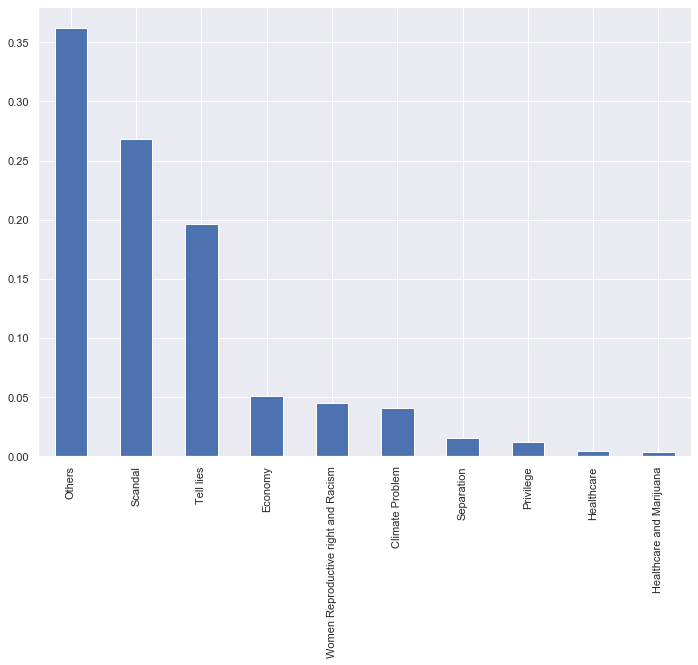

In [79]:
election2['negative_reason'].value_counts(normalize=True).plot(kind='bar')

In [80]:
election['sentiment'].value_counts()

positive    1127
negative    1006
Name: sentiment, dtype: int64

In [ ]:
election2.index = range(1006)


Here, I will use tf_idf on the clean_clean column of the election2 dataset for feature selection.

In [82]:
election2['clean_clean']=election2['clean_clean'].apply(lambda x: str(" ".join(i for i in x.split() if len(i)>2)))
vectorizer4 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None,max_features=80)
array_TF_IDF = vectorizer4.fit_transform(election2['clean_clean']).toarray()
print( vectorizer4.get_feature_names() )
print( array_TF_IDF )

['abort', 'andrew', 'andrewsch', 'answer', 'bernier', 'call', 'campaign', 'canada', 'canadavot', 'canadian', 'candid', 'care', 'cbckati', 'cdnelxn', 'cdnmedia', 'cdnpoli', 'chang', 'chooseforward', 'climat', 'comment', 'con', 'conserv', 'consult', 'corrupt', 'countri', 'cpc', 'cpc_hq', 'day', 'destroy', 'elect', 'elxn', 'endors', 'feder', 'firm', 'good', 'govern', 'guy', 'hire', 'justin', 'justintrudeau', 'kinsella', 'kinsellag', 'kinsellawarren', 'leader', 'liber', 'liberal_parti', 'lie', 'maximeberni', 'media', 'monday', 'ndp', 'news', 'nhe', 'parti', 'pay', 'peopl', 'polici', 'polit', 'ppc', 'question', 'report', 'rosiebarton', 'scheer', 'scheerli', 'smear', 'support', 'thejagmeetsingh', 'thing', 'time', 'today', 'trudeau', 'trudeaumustgo', 'vote', 'voter', 'warren', 'will', 'won', 'work', 'xef', 'year']
[[5.02435913 0.         3.01689109 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         4.35938283]
 [0.         0.         0.         

C:\Users\sketa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
tf_idfb=pd.DataFrame(array_TF_IDF, columns=vectorizer4.get_feature_names())

Using Tf_Idf feature selection, I got 80 most common and important words in the text column of the  ​negative ​2019 Canadian elections:
	Some of these words are the leader of some parties or the name and the of the parties.



In [84]:
#adding the negative_reason column of the election2 dataset to the tf_idfb dataset
tf_idfb['negative_reason']=election2['negative_reason']
tf_idfb['sentiment']=election2['sentiment']
tf_idfb.head()

,abort,andrew,andrewsch,answer,bernier,call,campaign,canada,canadavot,canadian,...,vote,voter,warren,will,won,work,xef,year,negative_reason,sentiment
0,5.024359,0.0,3.016891,0.0,0.0,0.0,0.0,3.196232,0.000000,3.532704,...,0.0,0.0,0.0,3.350383,0.0,0.0,0.0,0.000000,Women Reproductive right and Racism,negative
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3.196232,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.359383,Economy,negative
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,6.392464,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,Economy,negative
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3.196232,4.480744,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,Others,negative
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,Others,negative


In [85]:
tf_idfb.drop(columns='sentiment',inplace=True)
tf_idfb.head()

,abort,andrew,andrewsch,answer,bernier,call,campaign,canada,canadavot,canadian,...,trudeaumustgo,vote,voter,warren,will,won,work,xef,year,negative_reason
0,5.024359,0.0,3.016891,0.0,0.0,0.0,0.0,3.196232,0.000000,3.532704,...,0.000000,0.0,0.0,0.0,3.350383,0.0,0.0,0.0,0.000000,Women Reproductive right and Racism
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3.196232,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.359383,Economy
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,6.392464,0.000000,0.000000,...,3.854288,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,Economy
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3.196232,4.480744,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,Others
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,Others


In [86]:
xb=tf_idfb.drop(columns='negative_reason')
yb=tf_idfb[['negative_reason']]

In [87]:
#splitting the tf_idfb dataset into train and test set
from sklearn.model_selection import train_test_split
xb_train, xb_test, yb_train, yb_test = train_test_split(xb,yb,test_size=0.3)

I will fit the 3 functions for fitting logistic regression, KNN, and SVM algorithm based on the functions I defined in the previous part:

### logistic regression:

In [88]:
fit_logistic_regression(xb_train, yb_train, xb_test, yb_test)

Accuracy of Logistic Regression classifier on training set: 0.68
Accuracy of Logistic Regression classifier on test set: 0.52


C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Bonus:
    hyperparameter tuning:

In [89]:
hpt_logistic(xb_train, yb_train, xb_test, yb_test)

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

Best Hyper Parameters:
 {'C': 0.1}
Best Accuracy: 0.5496688741721855
Confusion Metrix:
 [[ 7  0  0  0  1  0  0  0  0  0]
 [ 1  4  0  0  2  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 5  5  1  1 72  4 20  4 25  4]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  6  0  1 26  0 46  0  5  3]
 [ 1  0  0  0  1  0  1  0  0  0]
 [ 2  0  0  0  7  0  3  1 33  1]
 [ 0  0  0  0  0  0  1  0  1  4]]


### KNN:

In [90]:
fit_KNN(xb_train, yb_train, xb_test, yb_test)

Accuracy of K-NN classifier on training set: 0.56
Accuracy of K-NN classifier on test set: 0.44


## Bonus:
    hyperparameter tuning:

In [91]:
hpt_KNN(xb_train, yb_train, xb_test, yb_test)

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y

Best Hyper Parameters:
 {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'distance'}
Accuracy: 0.4470198675496689
Confusion Metrix:
 [[ 3  0  0  0  1  0  0  0  0  0]
 [ 0  2  0  0  0  1  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [11 11  1  2 85  2 43  5 25  7]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  0 11  0 23  0 16  3]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 12  2  6  0 21  1]
 [ 0  0  0  0  0  0  0  0  0  1]]


C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


### SVM:

In [92]:
fit_SVM(xb_train, yb_train, xb_test, yb_test)

Accuracy of SVM classifier on test set: 0.50


## Bonus:
    hyperparameter tuning:

In [93]:
hpt_SVM(xb_train, yb_train, xb_test, yb_test)

C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Se

Best Hyper Parameters:
 {'C': 6, 'kernel': 'rbf'}
Accuracy: 0.4867549668874172
Confusion Metrix:
 [[ 5  0  0  0  1  0  1  0  0  0]
 [ 0  1  0  0  1  1  2  1  2  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 8  4  1  1 70  4 17  4 23  5]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 2  6  0  1 25  0 46  0 17  3]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 2  3  0  0 11  0  5  0 22  1]
 [ 0  0  0  0  1  0  1  0  0  3]]


In [94]:
tf_idfb['negative_reason'].unique()

array(['Women Reproductive right and Racism', 'Economy', 'Others',
       'Scandal', 'Tell lies', 'Privilege', 'Climate Problem',
       'Healthcare', 'Separation', 'Healthcare and Marijuana'],
      dtype=object)

Because 'Healthcare' and 'Healthcare and Marijuana' seem to be similar, I set the negative_reason of the datapoints having one of them as the negative _reason to be 'Healthcare'.


In [95]:
tf_idfb['negative_reason'] = tf_idfb['negative_reason'].apply(lambda x: 'Healthcare' if x == 'Healthcare and Marijuana' else x)

Now, I will implement the three models to the new dataset since I think I may get a higher accuracy.

In [97]:
xb2=tf_idfb.drop(columns='negative_reason')
yb2=tf_idfb[['negative_reason']]

In [98]:
#splitting the new dataset into train and test set
xb2_train, xb2_test, yb2_train, yb2_test = train_test_split(xb2,yb2,test_size=0.3)

In [99]:
fit_logistic_regression(xb2_train, yb2_train, xb2_test, yb2_test)

Accuracy of Logistic Regression classifier on training set: 0.66
Accuracy of Logistic Regression classifier on test set: 0.52


C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [100]:
fit_KNN(xb2_train, yb2_train, xb2_test, yb2_test)

Accuracy of K-NN classifier on training set: 0.56
Accuracy of K-NN classifier on test set: 0.48


In [101]:
fit_SVM(xb2_train, yb2_train, xb2_test, yb2_test)

Accuracy of SVM classifier on test set: 0.53


# 5. Results: 

Based on the outputs of my first model, most of the tweets about conservative party are predicted to be negative, and they are indeed negative. Therefore, analysing tweets could give us a good insight of people's opinion about conservative party.

However, we can see that analysing tweets is not perfect in predicting people's view about liberals. In fact, based on the results of my model, the negative tweets about liberals are more than positive ones, while in reality, positive views are more.

This is true also for tweets about ndp party or tweets not about one specific party. In fact, our model shows that for all of the four divisions of tweets, the negative tweets are more. However, it is only true for tweets about conservatives in action.

The difference between the results of the model and reality is that based on what assignment wants, the determination of whether a negative or positive tweet is related to a party is done with the help of only some limited words about each party.

For the second model, I think it may fail to predict the correct negative reason because of the following reasons:


• The number of features should increase. Maybe with the current number of features, the model is not able to efficiently predict the true negative reason for each negative tweet. In other words, there isn't sufficient number of relative features or words that could help the model predict the exact negative_reason connected to the words.

•	The model is overfitting. In other words, the accuracy of the train set is much higher than the accuracy of the test set.

In [102]:
#using our model with best accuracy to predict the negative_reason labels
main_modelb = svm.SVC(gamma='scale')
main_modelb.fit(xb2_train,yb2_train.values.ravel())
predictions_trainb = main_modelb.predict(xb2_train)
predictions_testb =main_modelb.predict(xb2_test)

In [103]:
#creating a dataframe with the following columns.
resultsb=pd.DataFrame(main_modelb.predict(xb2_test),columns=['negative_reason prediction'])
resultsb['true negative_reason']=election2['negative_reason']
resultsb

,negative_reason prediction,true negative_reason
0,Women Reproductive right and Racism,Women Reproductive right and Racism
1,Others,Economy
2,Others,Economy
3,Tell lies,Others
4,Scandal,Others
5,Scandal,Scandal
6,Others,Others
7,Others,Tell lies
8,Others,Scandal
9,Others,Others


For instance, for the second example, we can see that the true negative_reason is 'Economy', while my model predicts it to be 'others'.

That's because in the features, the model cannot find a relative word to Economy.

The text of this tweet is:

In [115]:
election2.loc[1,'clean_clean']

'brantford cost billion year justin elxn cdnpoli canada'

The feature are:

['abort', 'andrew', 'andrewsch', 'answer', 'bernier', 'call', 'campaign', 'canada', 'canadavot', 'canadian', 'candid', 'care', 'cbckati', 'cdnelxn', 'cdnmedia', 'cdnpoli', 'chang', 'chooseforward', 'climat', 'comment', 'con', 'conserv', 'consult', 'corrupt', 'countri', 'cpc', 'cpc_hq', 'day', 'destroy', 'elect', 'elxn', 'endors', 'feder', 'firm', 'good', 'govern', 'guy', 'hire', 'justin', 'justintrudeau', 'kinsella', 'kinsellag', 'kinsellawarren', 'leader', 'liber', 'liberal_parti', 'lie', 'maximeberni', 'media', 'monday', 'ndp', 'news', 'nhe', 'parti', 'pay', 'peopl', 'polici', 'polit', 'ppc', 'question', 'report', 'rosiebarton', 'scheer', 'scheerli', 'smear', 'support', 'thejagmeetsingh', 'thing', 'time', 'today', 'trudeau', 'trudeaumustgo', 'vote', 'voter', 'warren', 'will', 'won', 'work', 'xef', 'year']

A related word of this tweet to economy is cost. We can identify this tweet to be related to economy by seeing 'cost'.


However, this word is not in the features. Therefore, the model cannot truly predict the negative reason.

For the both models, I can increase accuracy by increasing the number of features. As a result, there would be more relative words to the negative reason of a tweet and in this way, the predictions of negative reasons would be more accurate.


because of my limited cpu power, I couldn't run many values for each of the hyperparameters. If I had a more powerful computer such as gpu, I could have tested more parameters, features and other complicated methods to increase the accuracy.

To prevent overfitting, I can use regularization.

## Bonus:
    plotting the predicted negative_reason vs. true negative_reason:

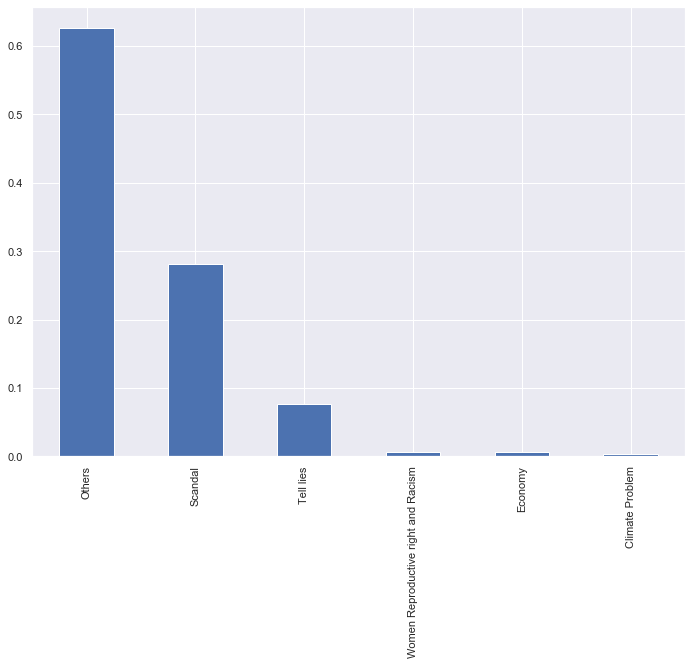

In [104]:
#the barplot of sentiment prediction based on different parties
resultsb['negative_reason prediction'].value_counts(normalize=True).plot(kind='bar')

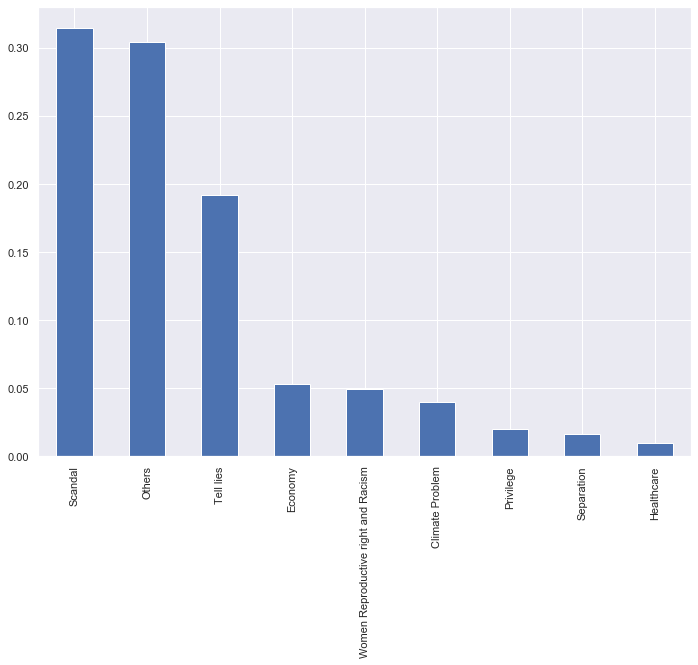

In [105]:
#the barplot of sentiment prediction based on different parties
resultsb['true negative_reason'].value_counts(normalize=True).plot(kind='bar')

As we can see, the prediction results show that the labelled negative reason of most negative tweets is scandal and indeed it is true. 



'others' negative reason is the highest number in the model prediction, while this unlabeled negative reason is the second highest one in reality.

## Bonus:
    plotting the predicted negative_reason vs. true negative_reason based on different parties:

In [106]:
resultsb['party']=election2['party']
resultsb.head()

,negative_reason prediction,true negative_reason,party
0,Women Reproductive right and Racism,Women Reproductive right and Racism,conservative
1,Others,Economy,liberal
2,Others,Economy,liberal
3,Tell lies,Others,conservative
4,Scandal,Others,liberal


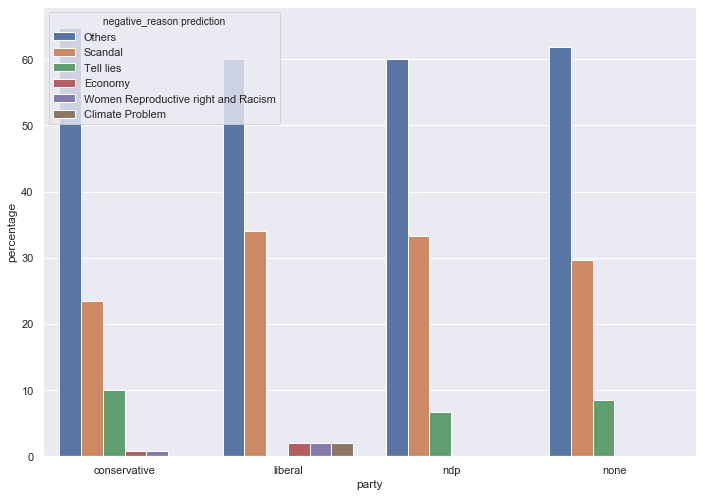

In [107]:
#the barplot of negative_reason prediction based on different parties
party_negative_reason_prediction = (resultsb.groupby(['party'])['negative_reason prediction']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('party'))
p = sns.barplot(x="party", y="percentage", hue='negative_reason prediction', data=party_negative_reason_prediction)
sns.set(rc={'figure.figsize':(20.7,20.27)})

Among tweets about all of the 4 divisions (liberal,conservative,ndp,none), we can observe that the predicted negative reason of most of them is unlabeled 'others'.

The labeled predicted negative reasons of most tweets about conservatives and liberals is scandal. In other words, people who wrote negative tweets about these 2 parties were mostly concerned about scandal.

The labeled predicted reason of most tweets written about ndp is scandal,too. 

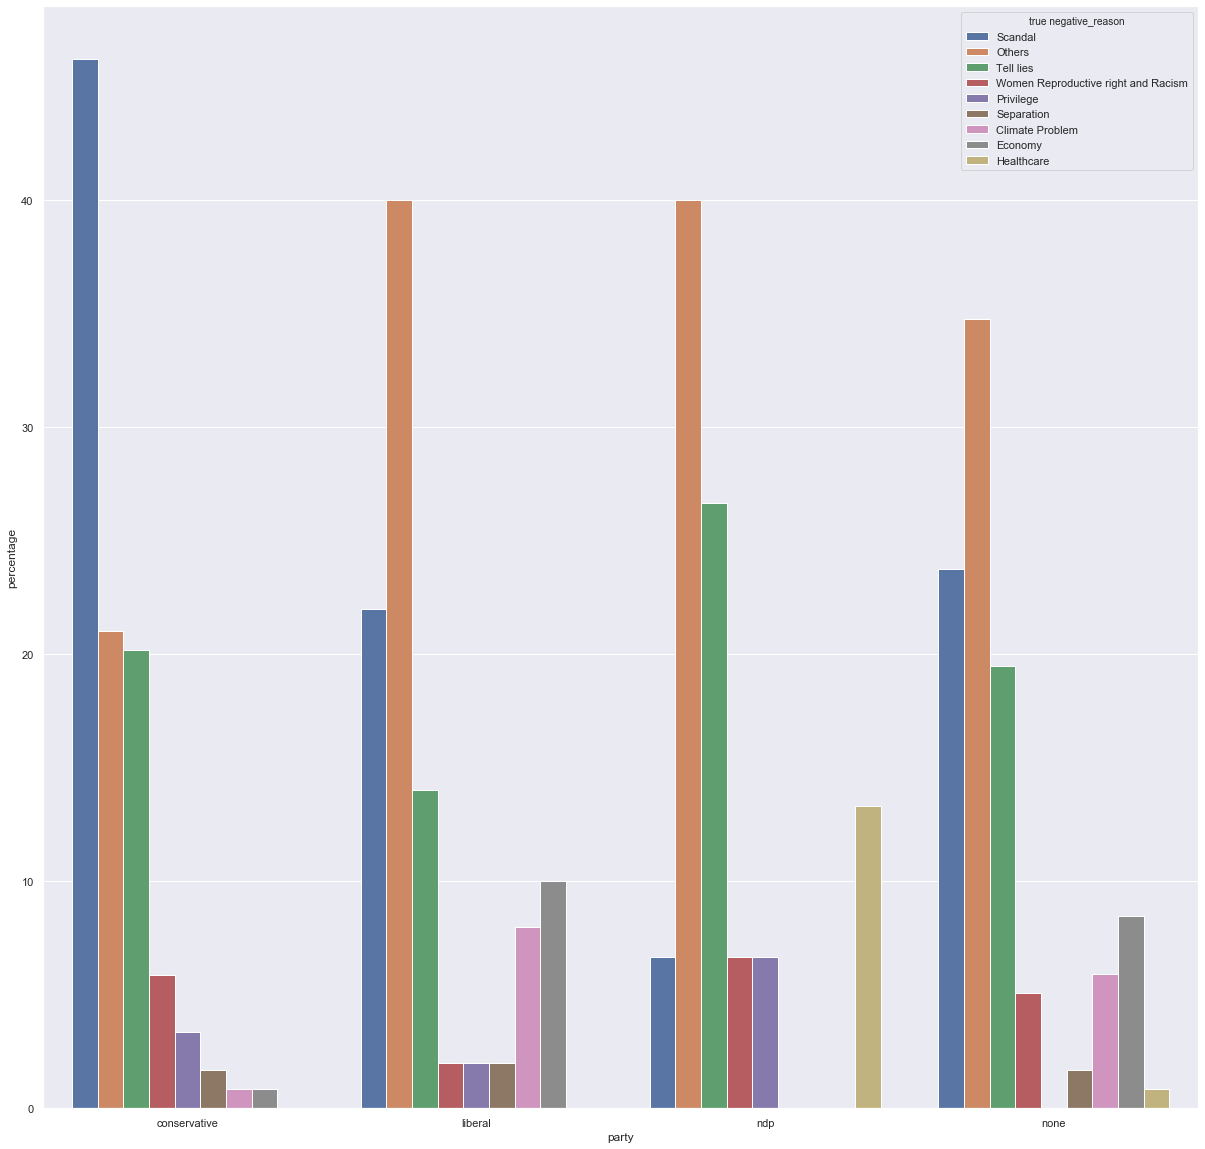

In [108]:
#the barplot of true negative_reason based on different parties
party_true_negative_reason = (resultsb.groupby(['party'])['true negative_reason']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('party'))
p = sns.barplot(x="party", y="percentage", hue='true negative_reason', data=party_true_negative_reason)
sns.set(rc={'figure.figsize':(20.7,18.27)})

Like the results of our model, In reality, we can observe that the labeled negative reason of most negative tweets about conservatives and liberals is about scandal. 



Tweets about ndp were negative mostly because of telling lies. In other words, people who wrote negative tweets about ndp were mostly concerned that  the leaders or other people related to this party tell lies.